<a href="https://colab.research.google.com/github/zeeshanali08/Resume/blob/main/aerofit_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('aerofit_treadmill.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [13]:
df.shape

(180, 9)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


From the above analysis, it is clear that, data has total of 9 features with mixed alpha numeric data. Also we can see that there is no missing data in the columns.

The data type of all the columns are matching with the data present in them. But we will change the datatype of Usage and Fitness into str(object).

In [10]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


🔍 Insights
1. Age - The age range of customers spans from 18 to 50 year, with an average age of 29 years.

2. Education - Customer education levels vary between 12 and 21 years, with an average education duration of 16 years.

3. Usage - Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average usage frequency of 3 times per week.

4. Fitness - On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness.

5. Income - The annual income of customers falls within the range of USD 30,000 to USD 100,000, with an average income of approximately USD 54,000.

6. Miles - Customers' weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.

In [17]:
df.duplicated().value_counts()

False    180
dtype: int64

There are no duplicate entries in the dataset

In [18]:
# Converting Int data type of fitness rating to object data type
df_cat = df
df_cat['Fitness_category'] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


Categorization of Fitness Rating to following descriptive categories

Poor Shape
Bad Shape
Average Shape
Good Shape
Excellent Shape

In [19]:
df_cat["Fitness_category"].replace({1:"Poor Shape",
                            2:"Bad Shape",
                            3:"Average Shape",
                            4:"Good Shape",
                            5:"Excellent Shape"},inplace=True)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


In [20]:
# for unique list of products, listed in percentage
sr = df['Product'].value_counts(normalize=True)
stat = sr.map(lambda calc: round(100*calc,2))
stat

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

In [21]:
# Customer Gender statistics (listed in %)
gender = df['Gender'].value_counts(normalize=True)
gender_res = gender.map(lambda calc: round(100*calc,2))
gender_res

Male      57.78
Female    42.22
Name: Gender, dtype: float64

In [22]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


Visual Analysis - Univariate & Bivariate
Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

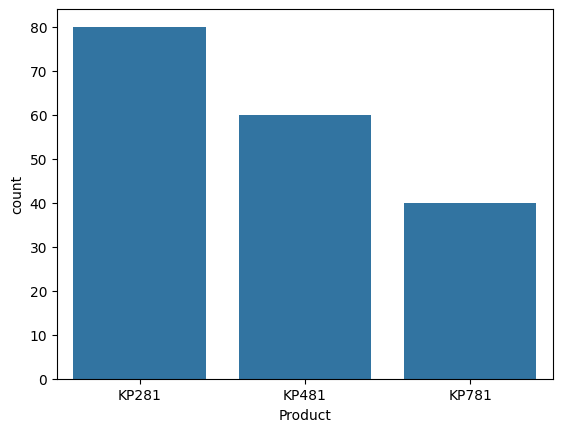

In [23]:
# Product Analysis - count plot
sns.countplot(data=df,x='Product')
plt.show



1.  KP281 is the most commonly purchase product type
2.  KP481 is the second most top product type purchased
3. KP781 is the least purchased product type





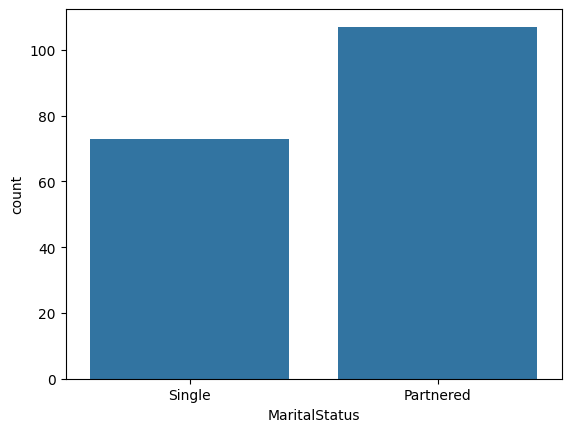

In [24]:
# Marital Status Analysis - Count plot
sns.countplot(data=df,x='MaritalStatus')
plt.show()

Most products purchased by couples/Married/Partnered customer category

<ipython-input-25-95a703dc699a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Gender',palette=['#432371',"#FAAE7B"])


<function matplotlib.pyplot.show(close=None, block=None)>

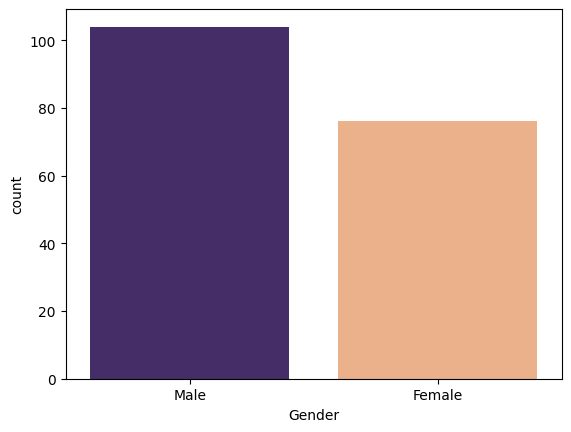

In [25]:
# Gender Analysis - Count Plot
sns.countplot(data=df,x='Gender',palette=['#432371',"#FAAE7B"])
plt.show

Most products purchased by Males, females are less interested in the product compared to Males


<ipython-input-26-72adb9189dc6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Fitness',palette=['#432371',"#FAAE7B","#bcbddc", "#efedf5",'#7fcdbb'])


<function matplotlib.pyplot.show(close=None, block=None)>

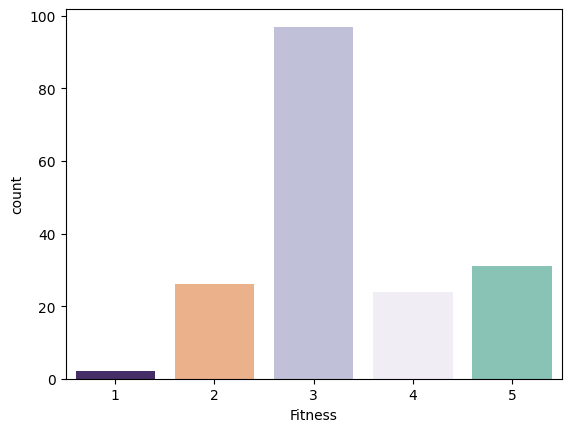

In [26]:
# Fitness rating analysis - count plot
sns.countplot(data=df,x='Fitness',palette=['#432371',"#FAAE7B","#bcbddc", "#efedf5",'#7fcdbb'])
plt.show


*  1.More than 90 customers have rated their physical fitness rating as Average

* 2.Excellent shape is the second highest rating provided by the customers




<ipython-input-27-c522b6424274>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Income,rug=True)


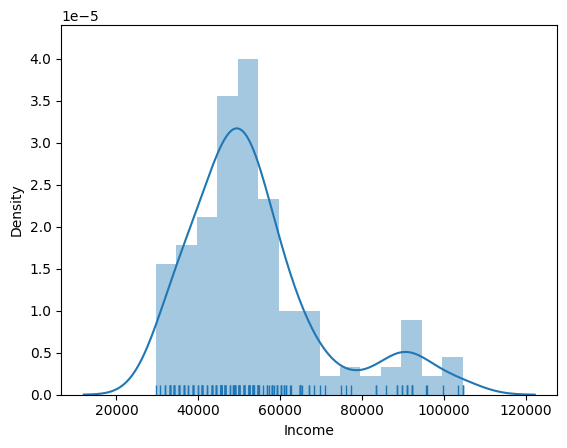

In [27]:
# Income Analysis - Distplot
sns.distplot(df.Income,rug=True)
plt.show()



*   Most of customers who have purchased the product have a average income between 40K to 60K

*   Average Income density is over 3.0



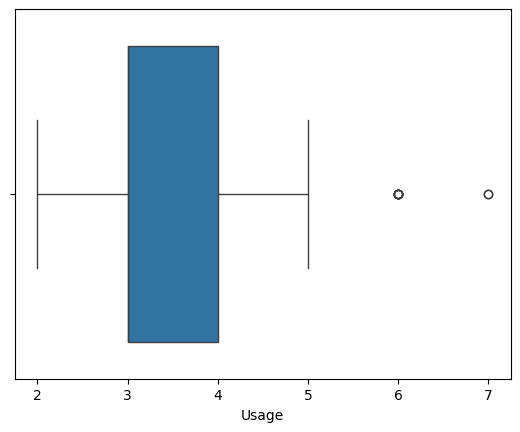

In [28]:
# Usage Analysis - Box plot
sns.boxplot(data=df,x='Usage')
plt.show()



*  3 to 4 days is the most preferred usage days for customers

*  6 and 7 days per week is roughly the usage days for few customers (Outliers)




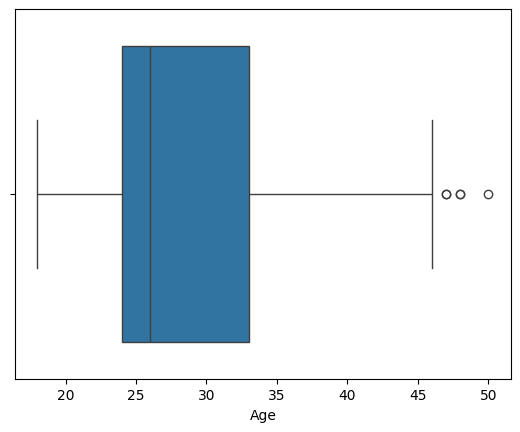

In [29]:
# Age Analysis - Box plot
sns.boxplot(data=df,x='Age')
plt.show()

Above 45 years old customers are very few compared to the young age group given in the dataset


23 to 34 is the most common customer age group that has purchased the product


<ipython-input-30-78b5541b1faa>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')


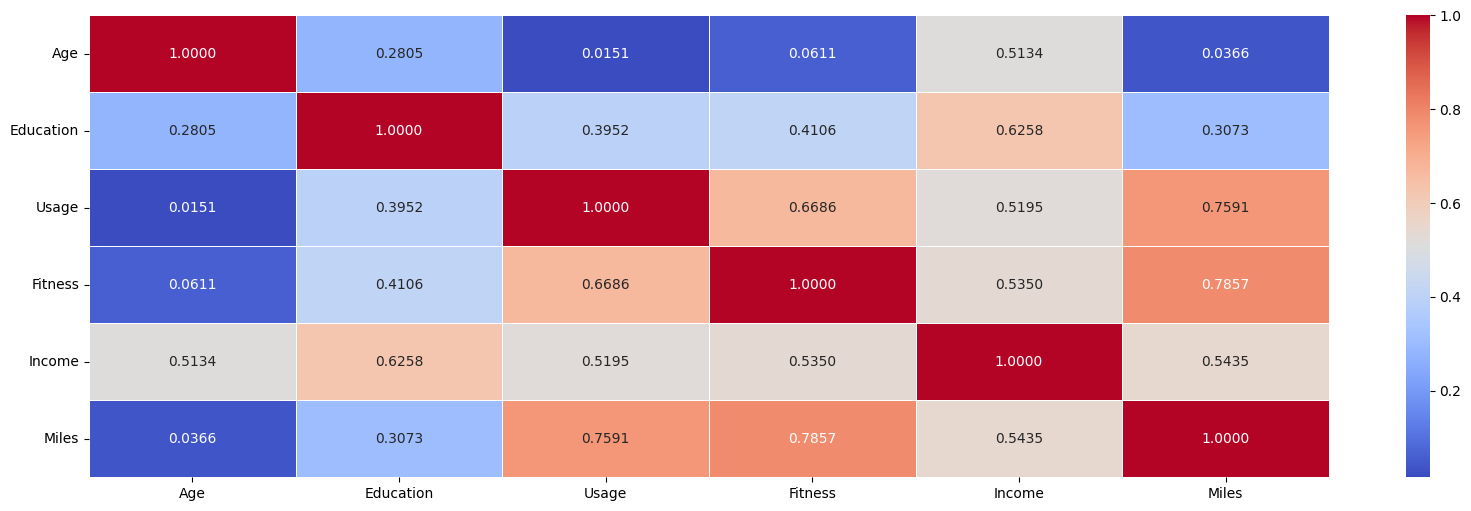

In [30]:
#Correlation HeatMap
plt.figure(figsize=(20,6))
ax = sns.heatmap(df.corr(),annot=True,fmt='.4f',linewidths=.5,cmap='coolwarm')
plt.yticks(rotation=0)
plt.show()

In the above heatmap linear relationship between data points is evaluated

1.Correlation between Age and Miles is 0.03
2.Correlation between Education and Income is 0.62
3.Correlation between Usage and Fitness is 0.66
4.Correlation between Fitness and Age is 0.06
5.Correlation between Income and Usage is 0.51
6.Correlation between Miles and Age is 0.03




Bivariate Analysis


In [31]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [32]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [33]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

In [34]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

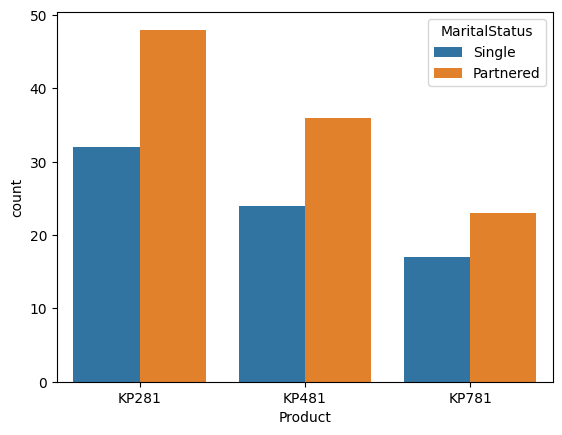

In [35]:
# Product purchased among Married/Partnered and Single
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.show()

In [38]:
#From the above countplot

#KP281 is the most preferred product among customers
#KP481 is the second most preferred product among the customers
#Between Singles and Partnered, Partnered customers are the major product purchasers

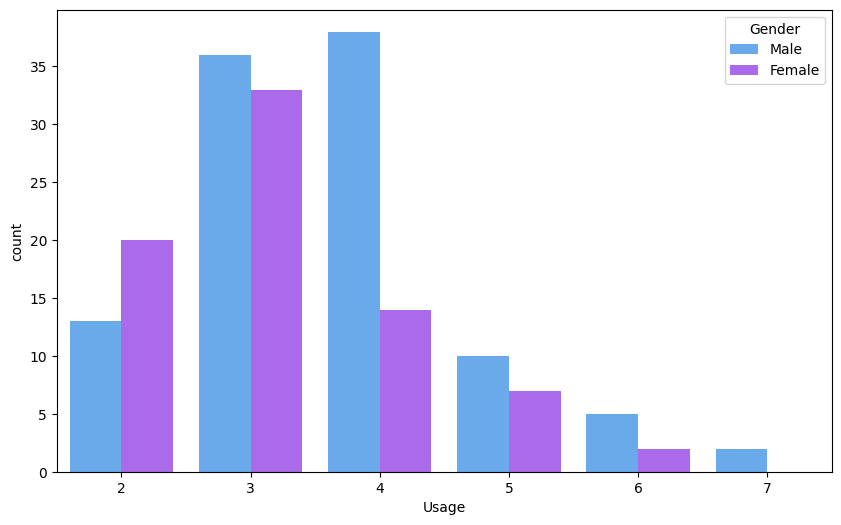

In [39]:
# Purchased product usage among Gender
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Usage',hue='Gender',palette='cool')
plt.show()



*   Among Male and Female genders, Male's usage is 4 days per week

*   Female customers mostly use 3 days per week


*  Only few Male customers use 7 days per week whereas female customer's maximum usage is only 6 days per week

*   List item





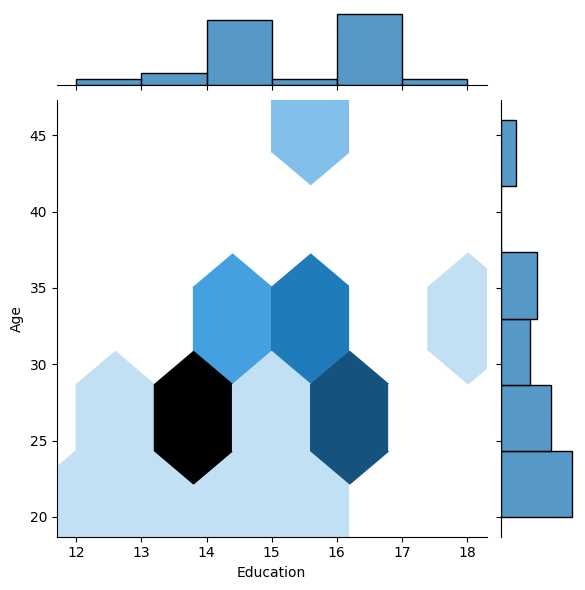

In [40]:
# Hex Scatterplot for customers Education and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Education',y='Age',kind='hex',data=df[df.Fitness<3])
plt.show()

Majority of the age and education density falls on 25-30 age group and 13-14 education

<Axes: xlabel='Education', ylabel='Age'>

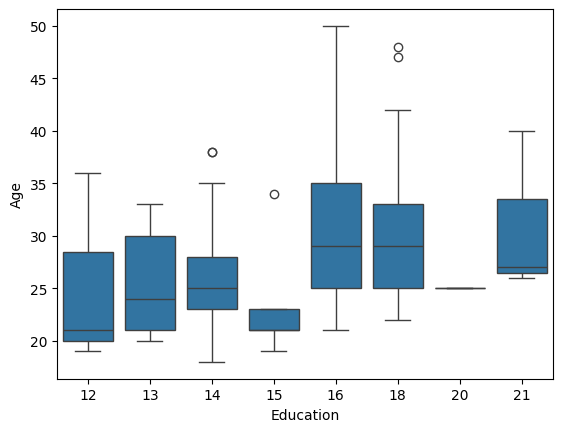

In [41]:
sns.boxplot(x='Education',y='Age',data=df)


Above box plot shows Education data against Age of the customer


Missing Value & Outlier Detection


In [42]:
df.isna().sum()


Product             0
Age                 0
Gender              0
Education           0
MaritalStatus       0
Usage               0
Fitness             0
Income              0
Miles               0
Fitness_category    0
dtype: int64

No Null values found in any columns



Outliers
Outliers for other categorical data are mentioned inline with the respective analysis



In [44]:
# Outlier calculation for Miles using Inter Quartile Range
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


Business Insights based on Non-Graphical and Visual Analysis


In [45]:
df.Product.value_counts(normalize=True)


KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Conditional and Marginal Probabilities


Two-Way Contingency Table

Marginal Probabilities

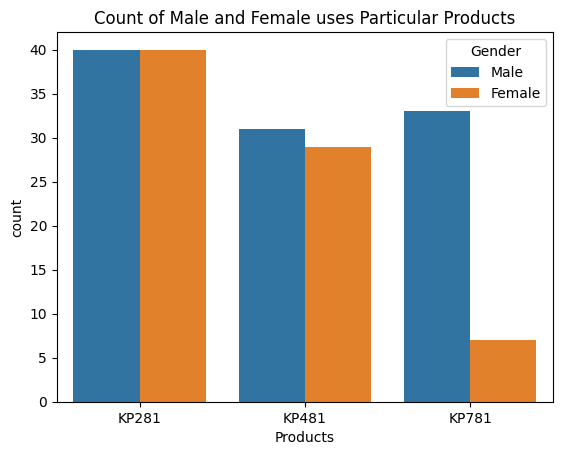

In [46]:
sns.countplot(x = "Product", data= df, hue = "Gender")
plt.xlabel("Products")
plt.title("Count of Male and Female uses Particular Products")
plt.show()

In [47]:
pd.crosstab([df.Product],df.Gender,margins=True)


Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [48]:
np.round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)


Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


Marginal Probability

Probability of Male Customer Purchasing any product is : 57.77 %

Probability of Female Customer Purchasing any product is : 42.22 %

Marginal Probability of any customer buying

product KP281 is : 44.44 % (cheapest / entry level product)

product KP481 is : 33.33 % (intermediate user level product)

product KP781 is : 22.22 % (Advanced product with ease of use that help in covering longer distance)

Conditional Probabilities

In [49]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)
#


Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


Probability of Selling Product

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

Objective: Customer Profiling for Each Product
Customer profiling based on the 3 product categories provided

KP281

Easily affordable entry level product, which is also the maximum selling product.

KP281 is the most popular product among the entry level customers.

This product is easily afforded by both Male and Female customers.

Average distance covered in this model is around 70 to 90 miles.

Product is used 3 to 4 times a week.

Most of the customer who have purchased the product have rated Average shape as the fitness rating.

Younger to Elder beginner level customers prefer this product.

Single female & Partnered male customers bought this product more than single male customers.

Income range between 39K to 53K have preferred this product.

KP481

This is an Intermediate level Product.

KP481 is the second most popular product among the customers.

Fitness Level of this product users varies from Bad to Average Shape depending on their usage.

Customers Prefer this product mostly to cover more miles than fitness.

Average distance covered in this product is from 70 to 130 miles per week.

More Female customers prefer this product than males.

Probability of Female customer buying KP481 is significantly higher than male.

KP481 product is specifically recommended for Female customers who are intermediate user.

Three different age groups prefer this product - Teen, Adult and middle aged.

Average Income of the customer who buys KP481 is 49K.

Average Usage of this product is 3 days per week.

More Partnered customers prefer this product.

There are slightly more male buyers of the KP481.

The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.

The buyers of KP481 in Single & Partnered, Male & Female are same.

The age range of KP481 treadmill customers is roughly between 24-34 years.

KP781

Due to the High Price & being the advanced type, customer prefers less of this product.

Customers use this product mainly to cover more distance.

Customers who use this product have rated excelled shape as fitness rating.

Customer walk/run average 120 to 200 or more miles per week on his product.

Customers use 4 to 5 times a week at least.

Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.

Middle aged to higher age customers tend to use this model to cover more distance.

Average Income of KP781 buyers are over 75K per annum

Partnered Female bought KP781 treadmill compared to Partnered Male.

Customers who have more experience with previous aerofit products tend to buy this product

This product is preferred by the customer where the correlation between Education and Income is High.

**Recommendation**
Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of 39K - 53K Dollars. These models should promoted as budget treadmills.

As KP781 provides more features and functionalities, the treadmill should be marketed for professionals and athletes.

KP781 product should be promotted using influencers and other international atheletes.

Research required for expanding market beyond 50 years of age considering health pros and cons.

Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.

KP781 can be recommended for Female customers who exercises extensively along with easy usage guidance since this type is advanced.

Target the Age group above 40 years to recommend Product KP781.

